## 1. Импорт необходимых библиотек

Начнем с импорта всех необходимых библиотек для анализа данных и построения модели.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report

## 2. Загрузка данных

**Описание признаков:**
- `age`: возраст пациента
- `sex`: пол (1 = мужской, 0 = женский)
- `cp`: тип боли в груди (1-4)
- `trestbps`: артериальное давление в покое (мм рт.ст.)
- `chol`: уровень холестерина (мг/дл)
- `fbs`: уровень сахара в крови натощак > 120 мг/дл
- `restecg`: результаты ЭКГ в покое (0-2)
- `thalach`: максимальная частота сердечных сокращений
- `exang`: стенокардия, вызванная физической нагрузкой (1 = да, 0 = нет)
- `oldpeak`: депрессия ST относительно состояния покоя
- `slope`: наклон пикового сегмента ST
- `ca`: количество основных сосудов (0-3)
- `thal`: талассемия (3 = нормальная, 6 = фиксированный дефект, 7 = обратимый дефект)
- `target`: диагноз болезни сердца (0 = нет, 1-4 = есть)

In [3]:
column_names = ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 
                'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target']

df = pd.read_csv('datasets/heart.csv', names=column_names, header=None)
print(f"Размер датасета: {df.shape[0]} строк, {df.shape[1]} столбцов")
df.head()

Размер датасета: 303 строк, 14 столбцов


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


## 3. Очистка данных


In [4]:
df = df.replace('?', np.nan)

print(f"Пропущенные значения: {df.isnull().sum().sum()}")

df = df.dropna()

Пропущенные значения: 6


## 4. Преобразование целевой переменной


In [5]:
df['target'] = (df['target'] > 0).astype(int)
print(df['target'].value_counts())

target
0    160
1    137
Name: count, dtype: int64


## 5. EDA

### 5.1 Корреляционный анализ


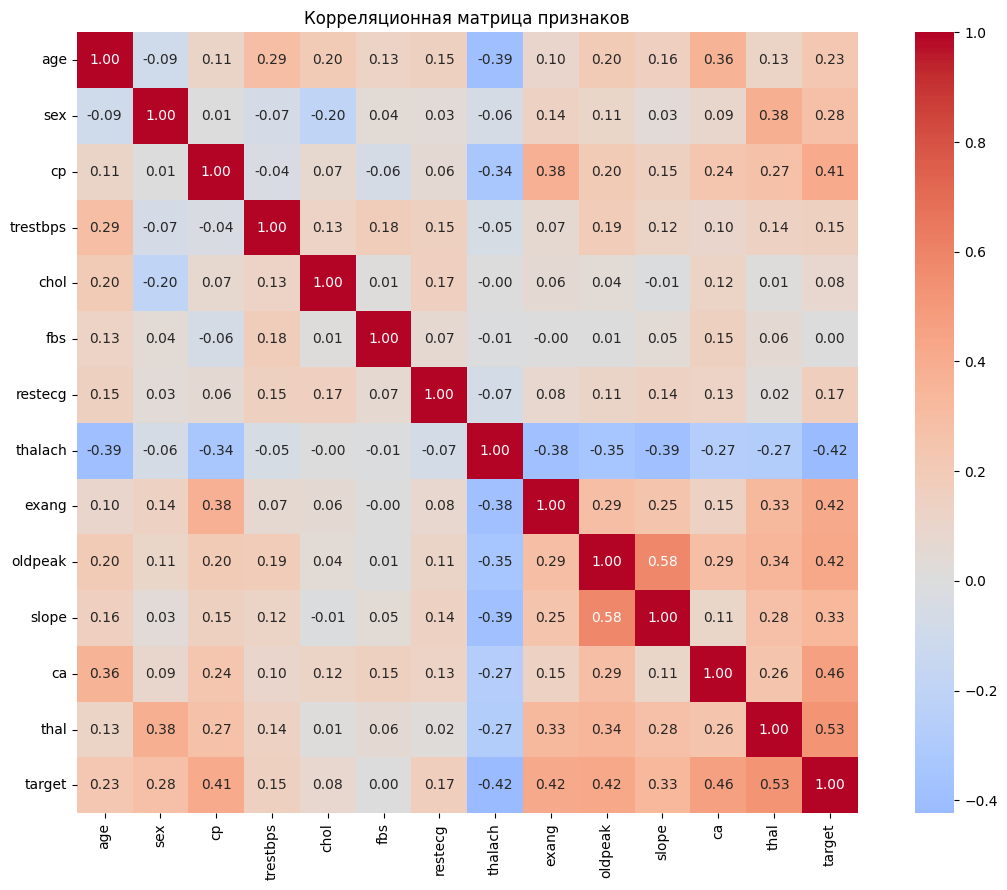

In [6]:
correlation_matrix = df.corr()

plt.figure(figsize=(12, 9))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0, square=True)
plt.title('Корреляционная матрица признаков')
plt.tight_layout()
plt.show()

### 5.2 Распределение признаков по классам


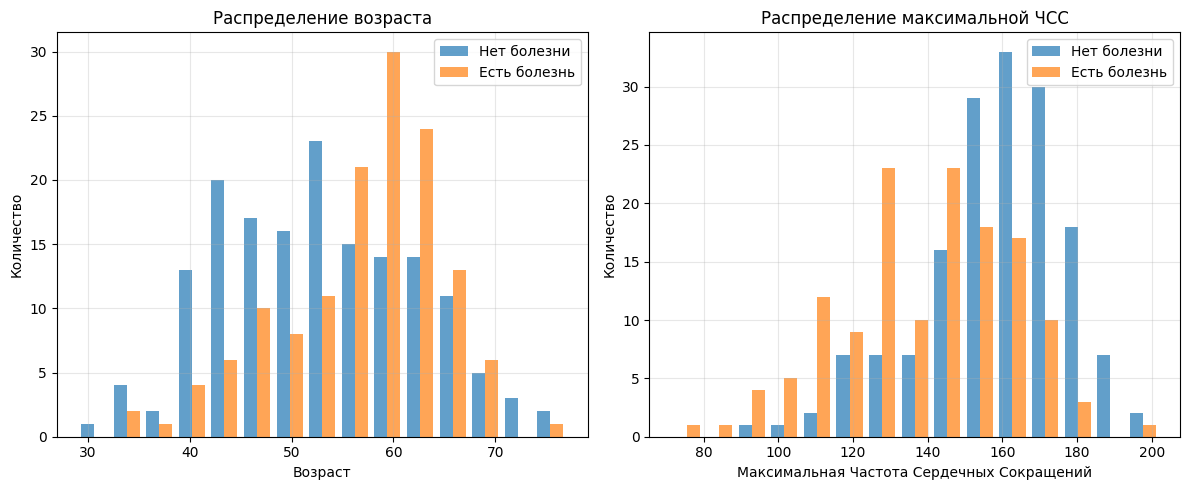

In [7]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].hist([df[df['target']==0]['age'], df[df['target']==1]['age']], 
             bins=15, label=['Нет болезни', 'Есть болезнь'], alpha=0.7)
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Количество')
axes[0].set_title('Распределение возраста')
axes[0].legend()
axes[0].grid(alpha=0.3)

axes[1].hist([df[df['target']==0]['thalach'], df[df['target']==1]['thalach']], 
             bins=15, label=['Нет болезни', 'Есть болезнь'], alpha=0.7)
axes[1].set_xlabel('Максимальная Частота Сердечных Сокращений')
axes[1].set_ylabel('Количество')
axes[1].set_title('Распределение максимальной ЧСС')
axes[1].legend()
axes[1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

## 6. Подготовка данных для обучения


In [8]:
X = df.drop('target', axis=1)
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f"Train: {X_train.shape[0]} | Test: {X_test.shape[0]}")

Train: 237 | Test: 60


## 7. Обучение модели логистической регрессии


In [9]:
model = LogisticRegression(random_state=42, max_iter=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_pred_proba_test = model.predict_proba(X_test)[:, 1]

print(f"Accuracy (train): {accuracy_score(y_train, y_pred_train):.4f}")
print(f"Accuracy (test):  {accuracy_score(y_test, y_pred_test):.4f}")

Accuracy (train): 0.8481
Accuracy (test):  0.8333


## 8. Матрица ошибок (Confusion Matrix)


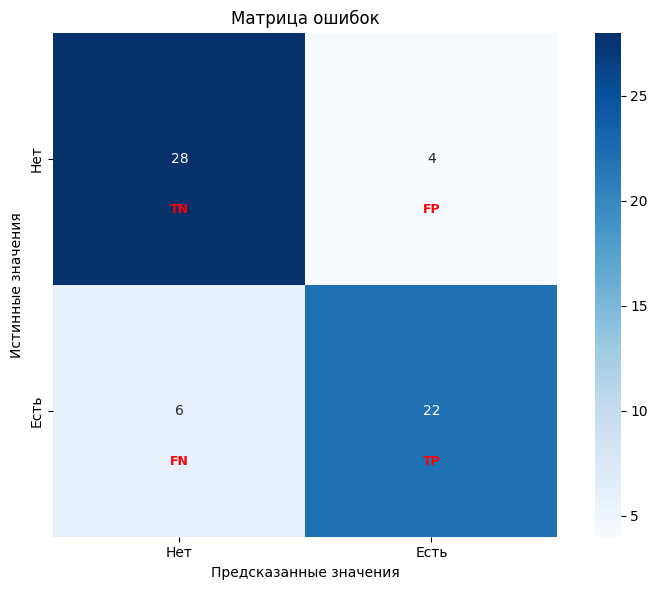

In [10]:
cm = confusion_matrix(y_test, y_pred_test)

fig, ax = plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', square=True,
            xticklabels=['Нет', 'Есть'],
            yticklabels=['Нет', 'Есть'])
plt.ylabel('Истинные значения')
plt.xlabel('Предсказанные значения')
plt.title('Матрица ошибок')

labels = [['TN', 'FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        ax.text(j+0.5, i+0.7, labels[i][j], ha='center', va='center', 
                fontsize=9, color='red', weight='bold')

plt.tight_layout()
plt.show()


## 9. Метрики качества классификации


**Accuracy (Точность)** - доля правильных предсказаний среди всех предсказаний:
$$\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$

**Precision (Прецизионность)** - доля истинно положительных среди всех предсказанных положительных:
$$\text{Precision} = \frac{TP}{TP + FP}$$

Показывает, какая доля объектов, предсказанных как "больные", действительно больны.

**Recall (Полнота/Чувствительность)** - доля найденных положительных среди всех истинно положительных:
$$\text{Recall} = \frac{TP}{TP + FN}$$

Показывает, какую долю больных пациентов модель смогла обнаружить.

In [11]:
accuracy = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)

# Извлекаем значения из матрицы ошибок
TN = cm[0, 0]  # True Negative
FP = cm[0, 1]  # False Positive
FN = cm[1, 0]  # False Negative
TP = cm[1, 1]  # True Positive

print(f"Accuracy:  {accuracy:.4f}  = ({TP}+{TN}) / ({TP}+{TN}+{FP}+{FN})")
print(f"Precision: {precision:.4f} = {TP} / ({TP}+{FP})")
print(f"Recall:    {recall:.4f} = {TP} / ({TP}+{FN})")

print("\n" + classification_report(y_test, y_pred_test, target_names=['Нет', 'Есть']))

Accuracy:  0.8333  = (22+28) / (22+28+4+6)
Precision: 0.8462 = 22 / (22+4)
Recall:    0.7857 = 22 / (22+6)

              precision    recall  f1-score   support

         Нет       0.82      0.88      0.85        32
        Есть       0.85      0.79      0.81        28

    accuracy                           0.83        60
   macro avg       0.83      0.83      0.83        60
weighted avg       0.83      0.83      0.83        60



## 10. Влияние порога классификации


In [12]:
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
results = []

for threshold in thresholds:
    y_pred_threshold = (y_pred_proba_test >= threshold).astype(int)
    acc = accuracy_score(y_test, y_pred_threshold)
    prec = precision_score(y_test, y_pred_threshold, zero_division=0)
    rec = recall_score(y_test, y_pred_threshold)
    results.append({'Порог': threshold, 'Accuracy': acc, 'Precision': prec, 'Recall': rec})

results_df = pd.DataFrame(results)
print(results_df.to_string(index=False))

 Порог  Accuracy  Precision   Recall
   0.3  0.850000   0.806452 0.892857
   0.4  0.850000   0.851852 0.821429
   0.5  0.833333   0.846154 0.785714
   0.6  0.866667   0.916667 0.785714
   0.7  0.866667   0.954545 0.750000


## 11. Важность признаков


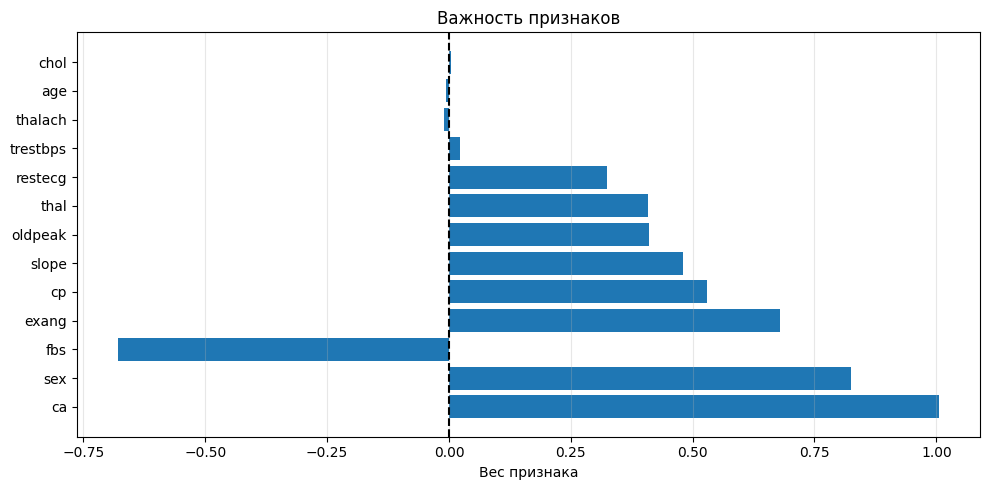

In [13]:
feature_names = X.columns
weights = model.coef_[0]

feature_importance = pd.DataFrame({
    'Признак': feature_names,
    'Вес': weights
})

feature_importance['Абс_вес'] = feature_importance['Вес'].abs()
feature_importance = feature_importance.sort_values('Абс_вес', ascending=False)

plt.figure(figsize=(10, 5))
plt.barh(feature_importance['Признак'], feature_importance['Вес'])
plt.xlabel('Вес признака')
plt.title('Важность признаков')
plt.axvline(x=0, color='black', linestyle='--')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()